# 🛒 Walmart Sales Forecasting

This notebook explores and analyzes weekly sales data from Walmart stores across the country.

## 📌 Objective

- Understand trends, seasonality, and patterns in weekly sales
- Analyze the impact of external factors like temperature, fuel price, CPI, and unemployment
- Identify top/worst performing stores
- Prepare the data for forecasting sales for the next 12 weeks

📅 Data covers multiple stores over time with weekly granularity.



************************************************************************

### Importing libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the data

In [3]:
df = pd.read_csv('Walmart.csv')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [4]:
df.info() #getting an overview of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


### Converting to datetime keeping the DD-MM-YYYY format and sorting the dataset by the Date colun

In [5]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.sort_values("Date",inplace=True)

In [6]:
df.isnull().sum() #checking for missing values

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

### Checking for outliers

<Axes: >

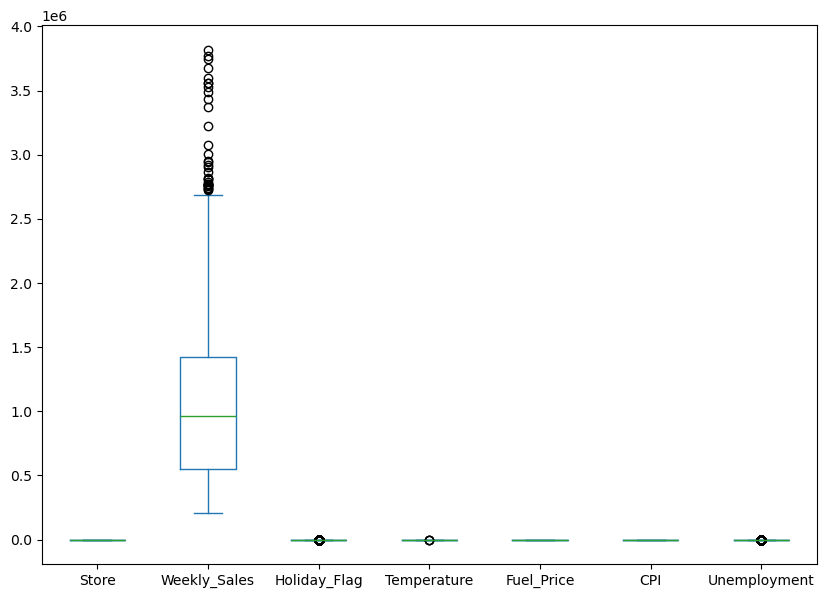

In [7]:
df.plot(kind='box', figsize=(10,7))

### Using IQR method to filter outliers of selected columns


In [8]:
for col in ['Weekly_Sales', 'Temperature']:
    q1 = df[col].quantile(0.25)  
    q3 = df[col].quantile(0.75)  
    iqr = q3 - q1                
    ul = q3 + 1.5 * iqr          
    ll = q1 - 1.5 * iqr          
    df = df[(df[col] >= ll) & (df[col] <= ul)]  

### Visualising distribution for the target column

In [9]:
df.duplicated().sum() #checking for duplicate rows

0

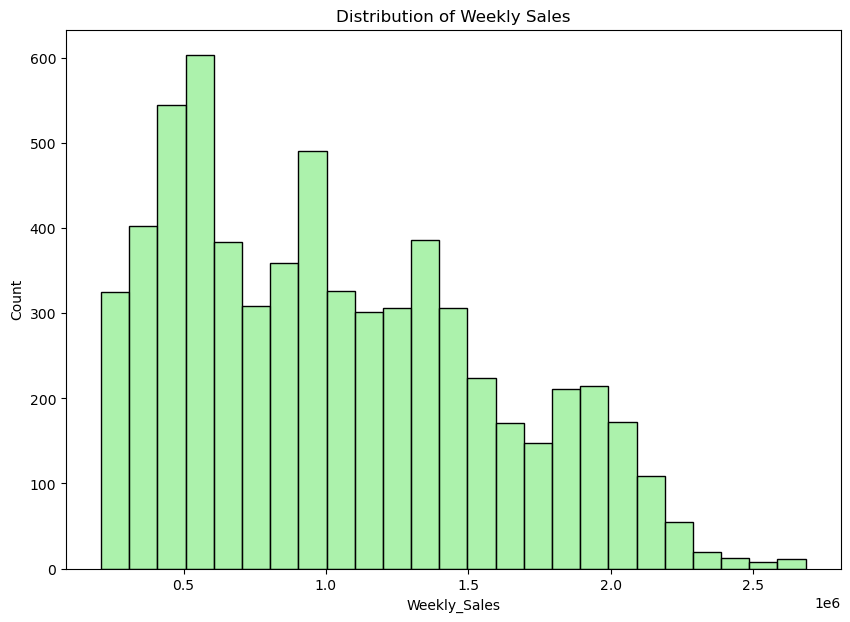

In [10]:
plt.figure(figsize=(10,7))
sns.histplot(df['Weekly_Sales'], bins=25, color='lightgreen')
plt.title('Distribution of Weekly Sales')
plt.show()

### Does Unemployment affect Weekly Sales?

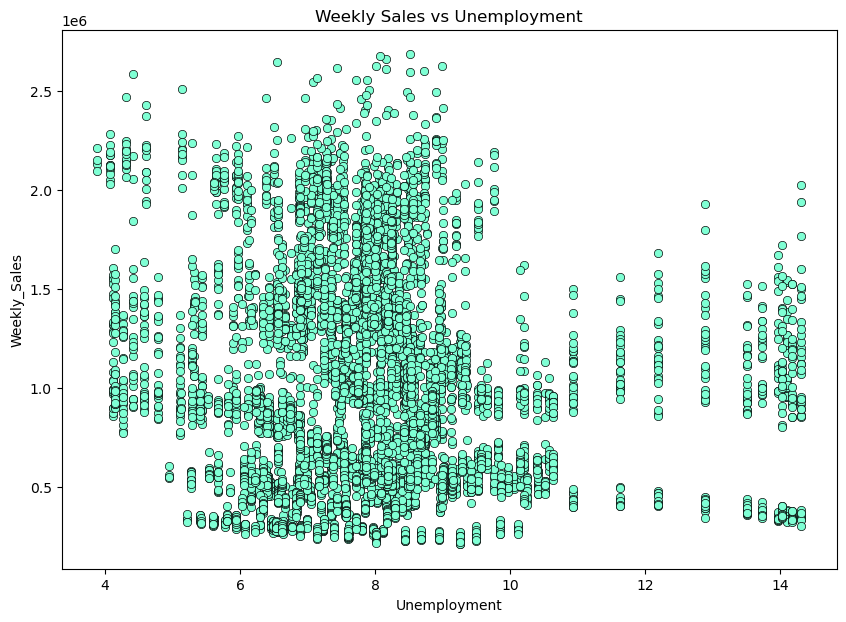

In [11]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df, x='Unemployment', y='Weekly_Sales', color='aquamarine', edgecolor='black')
plt.title('Weekly Sales vs Unemployment')
plt.show()

- There does NOT seem to be a significant correlation between Weekly Sales and Unemployment rate 


*************************

### If the weekly sales show a seasonal trend, when and what could be the reason?

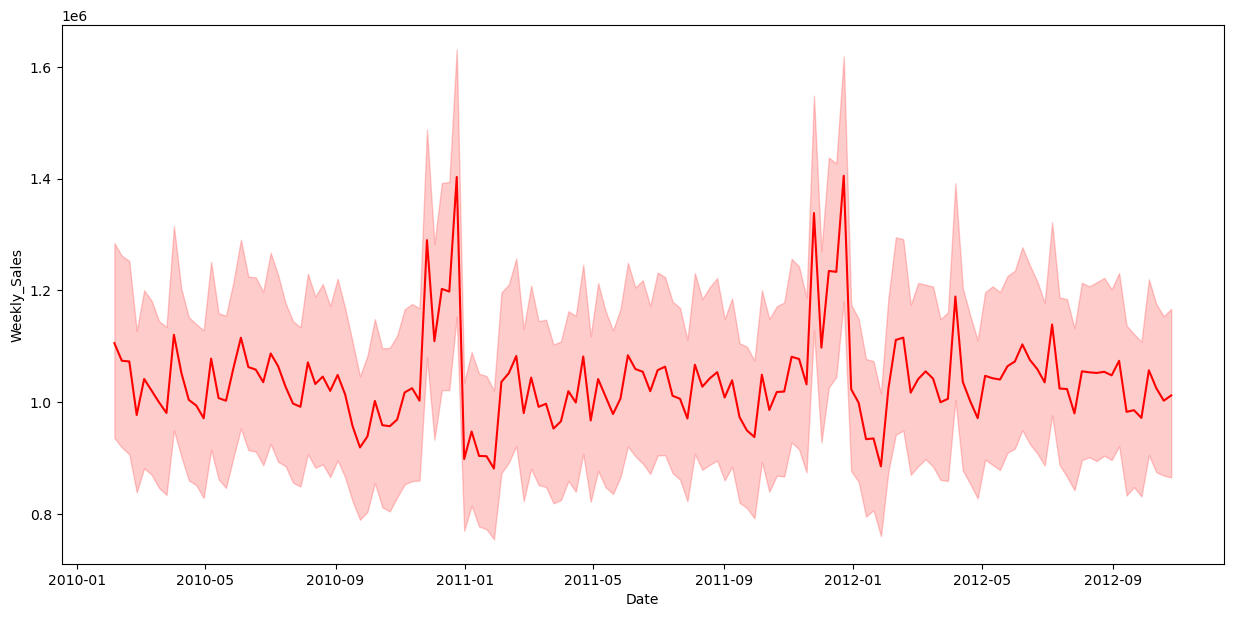

In [12]:
plt.figure(figsize=(15,7))
sns.lineplot(data=df, x='Date', y='Weekly_Sales', color='red')
plt.show()

- A seasonal trend can be observed every year during the last quarter. 
- The cause of these spikes in the sales could be the festivals and holidays like Halloween, Christmas, New Year, Thanksgiving, Black Friday etc whhich are celebrated in the near the of the year.
- The customers spend on gifts and celebration items for these festivals thus causing surges in sales.

***************************************

### Does temperature affect the weekly sales in any manner?

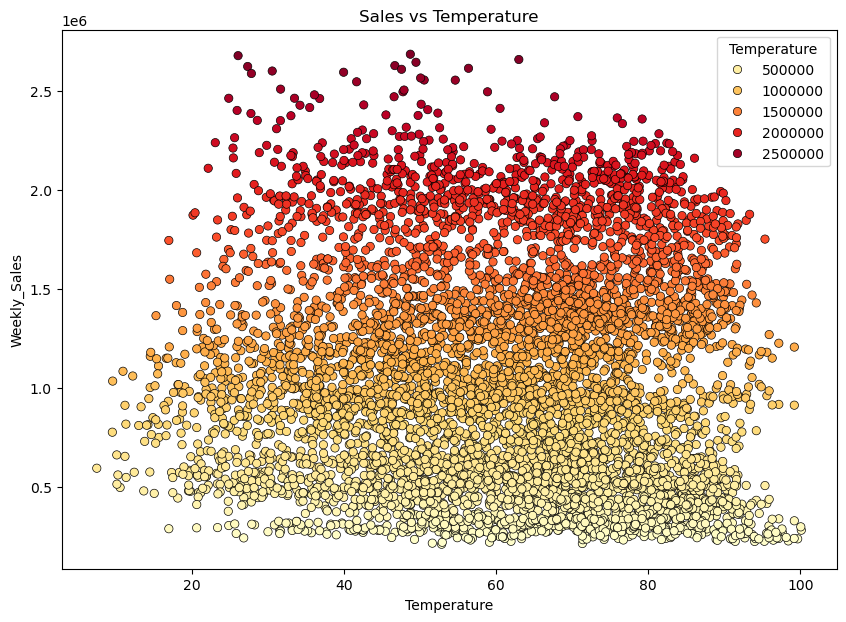

In [13]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='Temperature', y='Weekly_Sales', hue='Weekly_Sales', palette='YlOrRd', edgecolor='black')
plt.title('Sales vs Temperature')
plt.legend(title='Temperature')
plt.show()


- Nothing of significance can be observed 

*********************


### How is the Consumer Price index affecting the weekly sales of various stores?



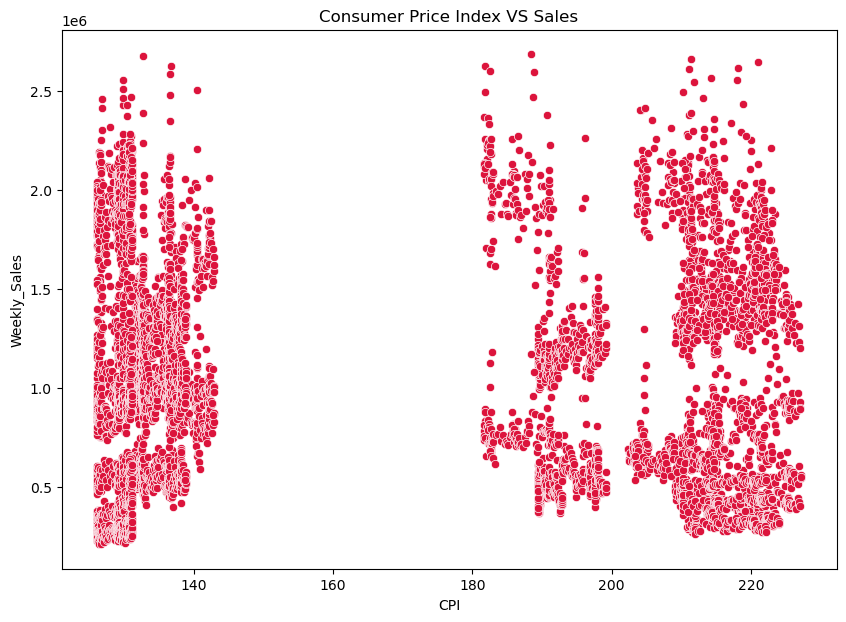

In [14]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df, x='CPI', y='Weekly_Sales', color='crimson')
plt.title('Consumer Price Index VS Sales')
plt.show()

- Still NO strong correlation or any relationship between these features

************

### Top performing stores according to the historical data.

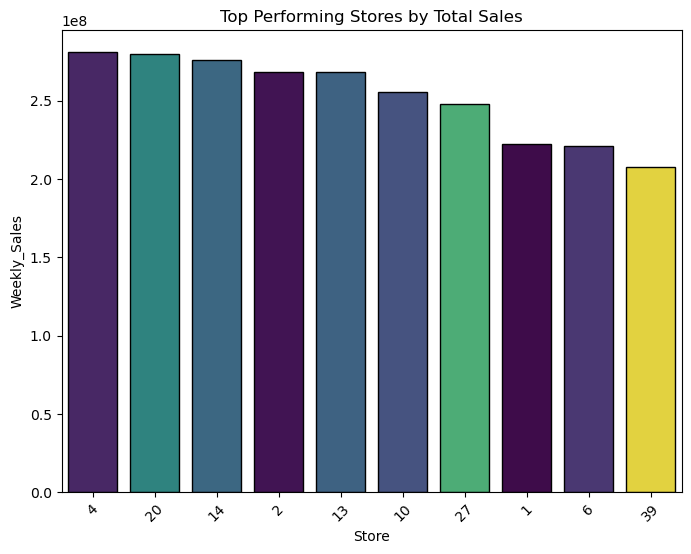

In [15]:
top_stores = df.groupby('Store')['Weekly_Sales'].sum().nlargest(10).reset_index()
plt.figure(figsize=(8,6))
sns.barplot(data=top_stores,
            x='Store',
            y='Weekly_Sales', 
            hue='Store', 
            palette='viridis', 
            order=top_stores['Store'], 
            legend=False,
            edgecolor='black')
plt.title('Top Performing Stores by Total Sales')
plt.xticks(rotation=45)
plt.show()


****

### The worst performing store, and how significant is the difference between the highest and lowest performing stores.

In [16]:
best_worst = df.groupby('Store')['Weekly_Sales'].sum()
best = best_worst.idxmax()
worst = best_worst.idxmin()
best_worst = best_worst.loc[[best, worst]].reset_index()

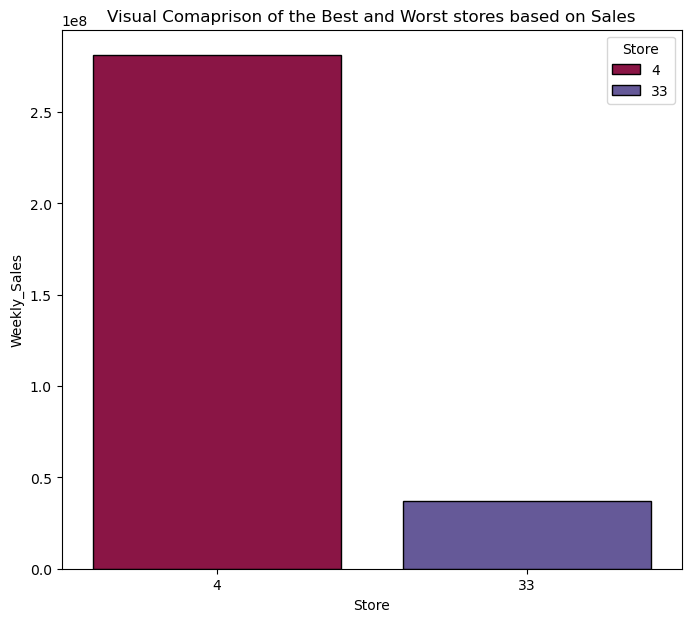

Difference between the Total Sales of THE BEST and THE WORST is:  243875002.96


In [17]:
plt.figure(figsize=(8,7))
sns.barplot(data=best_worst, 
            x='Store', 
            y='Weekly_Sales', 
            hue='Store', 
            palette='Spectral',
            edgecolor='black')
plt.title('Visual Comaprison of the Best and Worst stores based on Sales')
plt.show()
print('Difference between the Total Sales of THE BEST and THE WORST is: ',best_worst.iloc[0, 1] - best_worst.iloc[1,1] )

- Store number 4 is the BEST store on the basis of Sales with Total Sales of $2.810352e+08
- Store number 33 is the WORST store on the basis of Sales with Total Sales of $3.716022e+07
- The difference between their Total Sales is of $243875002.96

*****


## Start of Model Building Phase

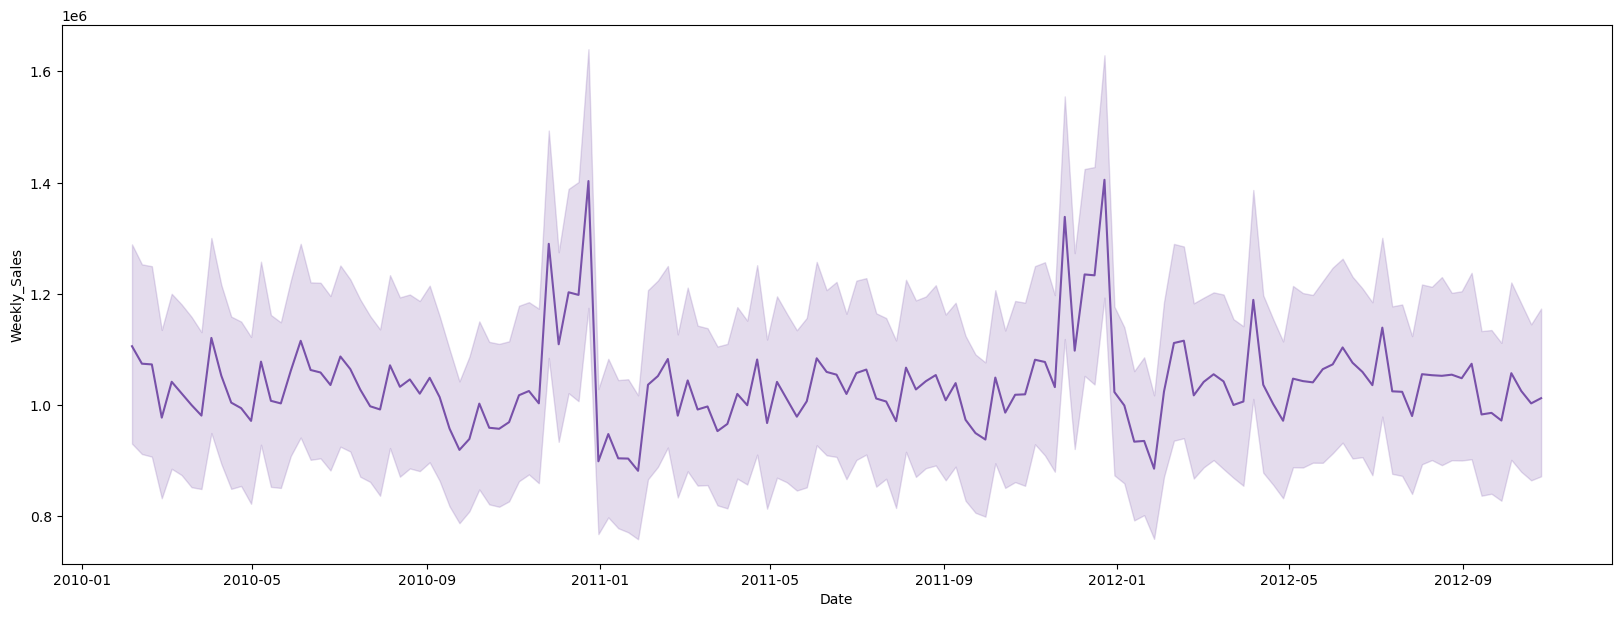

In [18]:
plt.figure(figsize=(20,7))
sns.lineplot(data=df, x='Date', y='Weekly_Sales', color='#7851a9')
plt.show()

- Visually,  seasonal peaks can be seen but NO trend can be observed 

In [19]:
from statsmodels.tsa.stattools import adfuller
p = adfuller(df['Weekly_Sales'].dropna())
if p[1] >= 0.05:
    print('non-stationary')
else:
    print('data is stationary')

data is stationary


- p < 0.05 → stationary 
- p >= 0.05 → not stationary (will need tansformation)